In [9]:
import numpy as np
import matplotlib.pyplot as plt

from network import *

In [10]:
hidden_size = 128
network = HopfieldNetwork(hidden_size = hidden_size)

In [11]:
pattern_size = 20
patterns = [np.random.choice([-1, 1], size = hidden_size) for _ in range(pattern_size)]
network.encode(patterns)

In [12]:
test_pattern = np.random.choice([-1, 1], size = hidden_size)
recalled_pattern = network.recall(test_pattern, steps = 1000)
print('recalled pattern:', recalled_pattern)

recalled pattern: [-1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1  1 -1  1  1  1 -1  1  1 -1  1 -1
 -1 -1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1 -1  1 -1  1  1 -1  1  1  1
 -1 -1 -1  1 -1  1  1  1 -1  1 -1  1  1 -1  1  1 -1 -1  1 -1 -1  1 -1  1
 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1  1 -1
 -1  1 -1  1 -1  1  1  1 -1 -1 -1  1  1 -1 -1  1 -1  1  1  1 -1  1 -1  1
  1  1  1  1 -1 -1  1 -1]


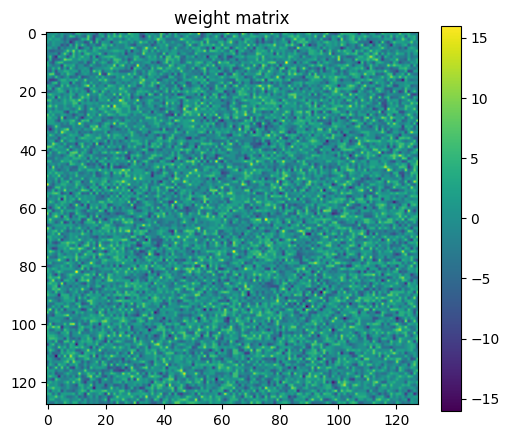

In [13]:
# visualizing the weight matrix
plt.figure(figsize = (6, 5))
plt.imshow(network.weights)
plt.colorbar()
plt.title('weight matrix')
plt.show()

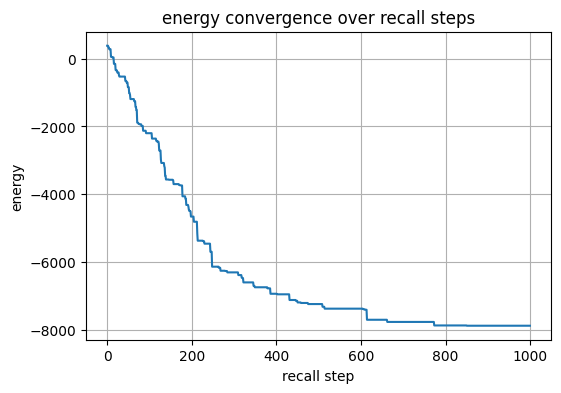

In [14]:
# tracking energy over recall steps
energies = []
state = test_pattern.copy()
for _ in range(1000):
    state = network.recall(state, steps = 1)
    energies.append(network.energy(state))

plt.figure(figsize = (6, 4))
plt.plot(energies)
plt.xlabel('recall step')
plt.ylabel('energy')
plt.title('energy convergence over recall steps')
plt.grid()
plt.show()

In [15]:
# tracking recall evolution
states = []
state = test_pattern.copy()
print(f'initial pattern: {state}')
for step in range(10):
    state = network.recall(state, steps = 1)
    states.append(state)
    print(f'step {step+1}: {state}')

initial pattern: [ 1  1  1 -1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1  1 -1 -1  1 -1
  1 -1  1  1 -1  1  1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1 -1 -1 -1  1
 -1  1  1  1 -1 -1 -1  1  1  1 -1  1  1 -1  1  1 -1  1 -1  1 -1  1 -1 -1
  1 -1  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1  1  1 -1  1 -1  1 -1
 -1  1 -1  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1  1
 -1 -1 -1 -1  1  1  1  1]
step 1: [ 1  1  1 -1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1  1 -1 -1  1 -1
  1 -1  1  1 -1  1  1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1 -1 -1 -1  1
 -1  1  1  1 -1 -1 -1  1  1  1 -1  1  1 -1  1  1 -1  1 -1  1 -1  1 -1 -1
  1 -1  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1  1  1 -1  1 -1  1 -1
 -1  1 -1  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1  1
 -1 -1 -1 -1  1  1  1  1]
step 2: [ 1  1  1  1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1  1 -1 -1  1 -1
  1 -1  1  1 -1  1  1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1 -1 -1 -1  1
 -1  1  1  1 -1 -1 -1  1  1  1 -1  1  1

In [16]:
# checking stability of stored patterns
stabilities = []
for i, pattern in enumerate(patterns):
    recalled_pattern = network.recall(pattern, steps = 1000)
    is_stable = np.array_equal(pattern, recalled_pattern)
    stabilities.append(is_stable)
    print(f"pattern {i + 1}: stable? {'yes' if is_stable else 'no'}")

pattern 1: stable? yes
pattern 2: stable? yes
pattern 3: stable? yes
pattern 4: stable? yes
pattern 5: stable? yes
pattern 6: stable? yes
pattern 7: stable? yes
pattern 8: stable? yes
pattern 9: stable? yes
pattern 10: stable? no
pattern 11: stable? yes
pattern 12: stable? yes
pattern 13: stable? yes
pattern 14: stable? no
pattern 15: stable? yes
pattern 16: stable? yes
pattern 17: stable? no
pattern 18: stable? yes
pattern 19: stable? yes
pattern 20: stable? no
